In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

Downloaded a few comma-delimited data from the <b>United States Department of Transportation, Bureau of Transportation Statistics website.</b> <br>
This data ranges from the months of <b>Janurary - May in 2016.</b><br>

In this specific example, I collected data that had either <b>DEST_CITY_NAME</b> or <b>ORGIN_CITY_NAME</b> related to California. What does this mean? It means that a specific flight had either departed or landed in a California based airport.

You can use filters to identify a specific dataset you want to look at.<br>
You can download your own source [here](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)

In [118]:
# Assign a list of available files in my data directory (../data/2016/) to a variable
files = os.listdir("data/2016");

# Display
files

['162820111_T_ONTIME-APRIL.csv',
 '162820111_T_ONTIME-FEB.csv',
 '162820111_T_ONTIME-JAN.csv',
 '162820111_T_ONTIME-MARCH.csv',
 '162820111_T_ONTIME-MAY.csv']

In [119]:
# Read through all files and concat all df into a single dataframe, df.
framelist = []

for file in files:
    tempdf = pd.read_csv("data/2016/" + file)
    framelist.append(tempdf)
    
df = pd.concat(framelist);

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's look at some basic info with the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485856 entries, 0 to 103365
Data columns (total 22 columns):
YEAR                     485856 non-null int64
MONTH                    485856 non-null int64
UNIQUE_CARRIER           485856 non-null object
AIRLINE_ID               485856 non-null int64
ORIGIN_AIRPORT_ID        485856 non-null int64
ORIGIN_AIRPORT_SEQ_ID    485856 non-null int64
ORIGIN_CITY_MARKET_ID    485856 non-null int64
ORIGIN_CITY_NAME         485856 non-null object
DEST_AIRPORT_ID          485856 non-null int64
DEST_AIRPORT_SEQ_ID      485856 non-null int64
DEST_CITY_MARKET_ID      485856 non-null int64
DEST_CITY_NAME           485856 non-null object
ARR_DELAY_NEW            479829 non-null float64
CANCELLED                485856 non-null float64
CANCELLATION_CODE        5125 non-null object
AIR_TIME                 479829 non-null float64
CARRIER_DELAY            85180 non-null float64
WEATHER_DELAY            85180 non-null float64
NAS_DELAY                85180 no

In [5]:
df.head()

,YEAR,MONTH,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 21
0,2016,4,AA,19805,12478,1247803,31703,"New York, NY",12892,1289203,...,0.0,0.0,NaN,329.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,4,AA,19805,12478,1247803,31703,"New York, NY",12892,1289203,...,0.0,0.0,NaN,329.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,4,AA,19805,12478,1247803,31703,"New York, NY",12892,1289203,...,68.0,0.0,NaN,339.0,33.0,0.0,7.0,0.0,28.0,NaN
3,2016,4,AA,19805,12478,1247803,31703,"New York, NY",12892,1289203,...,0.0,0.0,NaN,345.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,4,AA,19805,12478,1247803,31703,"New York, NY",12892,1289203,...,22.0,0.0,NaN,350.0,0.0,0.0,22.0,0.0,0.0,NaN


In [6]:
# Drop the last column in place, 'Unnamed: 21', which is the -1 index
df.drop(df.columns[[-1]], axis=1, inplace=True)

Lets see what different airlines we have data for.

In [7]:
df.UNIQUE_CARRIER.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX', 'WN'], dtype=object)

I retrieved this information from a lookup table from the transtats website, let's assign it to a key/value dict for later use.

In [8]:
airlinekeys = {'AA': 'American Airlines Inc',
               'AS': 'Alaska Airlines Inc.',
               'B6': 'JetBlue Airways',
               'DL': 'Delta Airlines Inc.',
               'F9': 'Frontier Airlines Inc',
               'HA': 'Hawaiian Airlines Inc',
               'NK': 'Spirit Airlines',
               'OO': 'SkyWest Airlines Inc',
               'UA': 'United Airlines Inc.',
               'VX': 'Virgin America',
               'WN': 'Southwest Airlines Co' }

pd.DataFrame.from_dict(airlinekeys, orient="index")

,0
VX,Virgin America
DL,Delta Airlines Inc.
NK,Spirit Airlines
F9,Frontier Airlines Inc
AA,American Airlines Inc
B6,JetBlue Airways
HA,Hawaiian Airlines Inc
UA,United Airlines Inc.
OO,SkyWest Airlines Inc
WN,Southwest Airlines Co


### Amount of flights recorded

In [120]:
# Display frequency of each airline recorded.
df['UNIQUE_CARRIER'].value_counts()

WN    138315
OO     72990
UA     70824
AA     67302
DL     47548
AS     29289
VX     24433
B6     17043
NK      9736
F9      4574
HA      3802
Name: UNIQUE_CARRIER, dtype: int64

So, as you can see here, 'WN' (Southwest) services the most flights IN/OUT of California. 'HA' (Hawaiian Airlines) has the fewest.<br>

Lets visualize that.

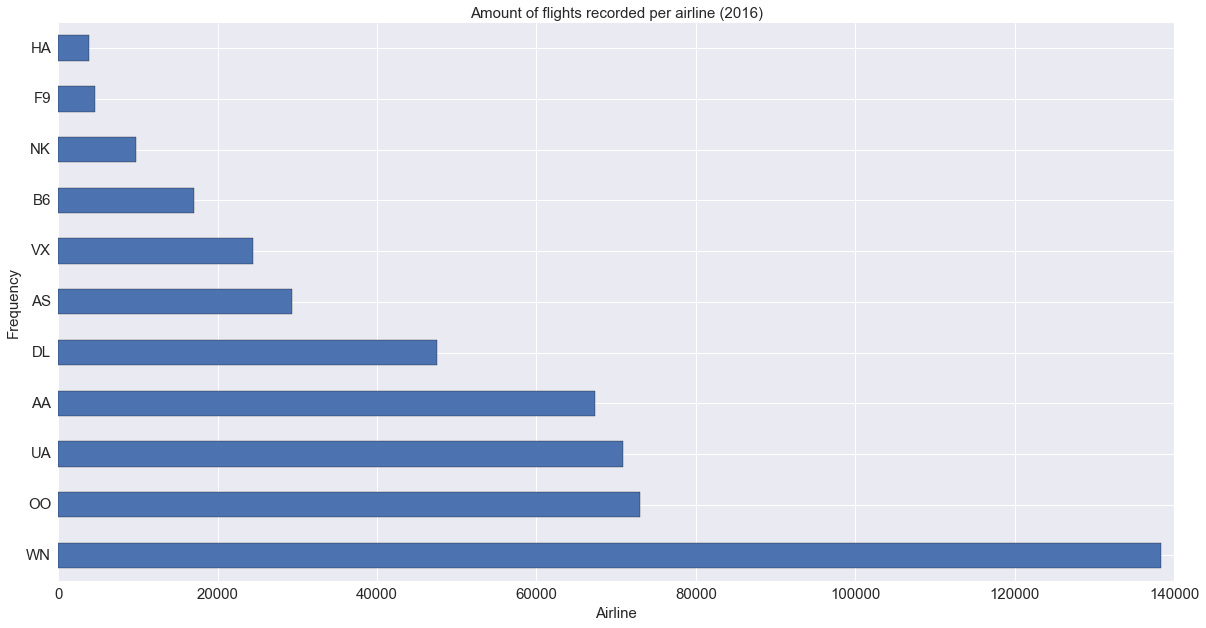

In [122]:
fig = plt.figure(figsize=(20,10))

df.UNIQUE_CARRIER.value_counts().plot(kind='barh')

plt.ylabel('Frequency', fontsize=15); plt.xlabel('Airline', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.title('Amount of flights recorded per airline (2016)', fontsize=15)

### Delay Statistics

In [125]:
# Function to return a dictionary of all delays greater than 0 per carrier

def delayratio(carrier):
    
    carrier = carrier.upper()
    
    total = (df.ix[(df['UNIQUE_CARRIER'] == carrier)]).shape[0]
    delays = (df.ix[(df['UNIQUE_CARRIER'] == carrier ) & (df['ARR_DELAY_NEW'] > 0 )]).shape[0]

    return({ 'Airline': carrier, 'Total': total, 'Delays': delays })

In [128]:
carrierlist = list(df.UNIQUE_CARRIER.unique())

print(carrierlist)

['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX', 'WN']


In [130]:
dflist = []

for val, item in enumerate(carrierlist):
    dflist.append(delayratio(carrierlist[val]))

dflist

[{'Airline': 'AA', 'Delays': 23258, 'Total': 67302},
 {'Airline': 'AS', 'Delays': 9412, 'Total': 29289},
 {'Airline': 'B6', 'Delays': 6750, 'Total': 17043},
 {'Airline': 'DL', 'Delays': 14263, 'Total': 47548},
 {'Airline': 'F9', 'Delays': 1389, 'Total': 4574},
 {'Airline': 'HA', 'Delays': 1276, 'Total': 3802},
 {'Airline': 'NK', 'Delays': 4701, 'Total': 9736},
 {'Airline': 'OO', 'Delays': 25704, 'Total': 72990},
 {'Airline': 'UA', 'Delays': 19553, 'Total': 70824},
 {'Airline': 'VX', 'Delays': 9989, 'Total': 24433},
 {'Airline': 'WN', 'Delays': 56518, 'Total': 138315}]

In [131]:
# Let's put the list of dicts into a dataframe
delayratiodf = pd.DataFrame(dflist)

# Let's set the index of the dataframe to be 'Airline'
delayratiodf.set_index('Airline', inplace=True)

# Let's use the airlinekey dictionary we made earlier to replace the airline codenames
delayratiodf.rename(index=airlinekeys, inplace=True)

In [132]:
delayratiodf

,Delays,Total
Airline,,
American Airlines Inc,23258,67302
Alaska Airlines Inc.,9412,29289
JetBlue Airways,6750,17043
Delta Airlines Inc.,14263,47548
Frontier Airlines Inc,1389,4574
Hawaiian Airlines Inc,1276,3802
Spirit Airlines,4701,9736
SkyWest Airlines Inc,25704,72990
United Airlines Inc.,19553,70824


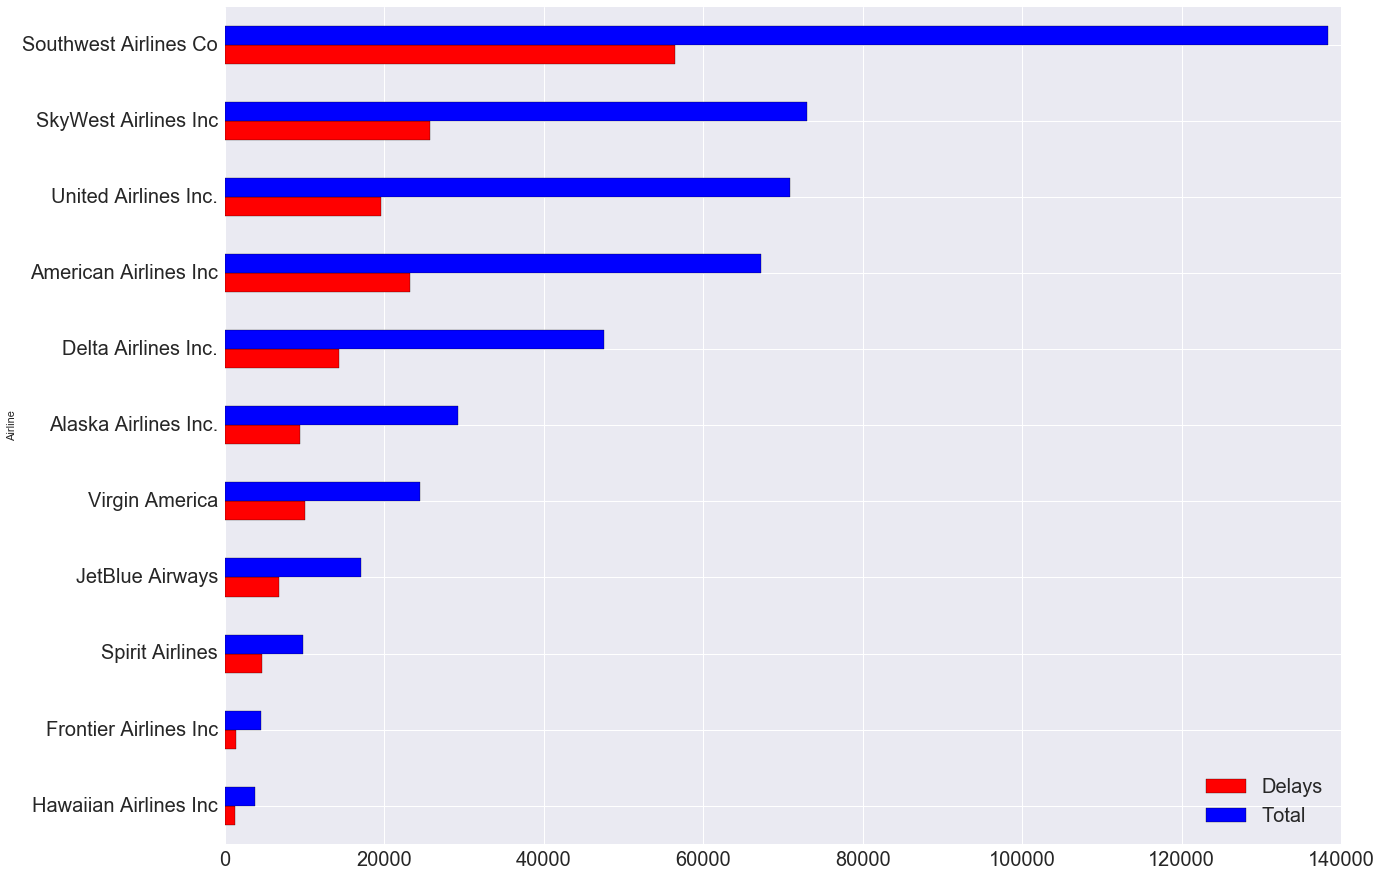

In [145]:
# Lets sort by total flights
delayratiodf.sort_values('Total', inplace=True)

# Create a stacked barchart
plot = delayratiodf[['Delays', 'Total']].plot(kind='barh', figsize=(20,15), legend=True, fontsize=20, color=['r', 'b'])

# Increase the legend size
plot.legend(loc=4, prop={'size':20})

### Frequency of delays

In [146]:
# Simple function to determine ratio
def ratio(df):
    
    return float("%.2f" % ((df[0]/df[1])*100))

In [147]:
# Create a new column 'Percentage', and apply the function 'ratio' to the data.
delayratiodf['Percentage'] = delayratiodf.apply(ratio, axis=1)

# Sort values again by percentage
delayratiodf.sort_values('Percentage', inplace=True)

In [148]:
delayratiodf

,Delays,Total,Percentage
Airline,,,
United Airlines Inc.,19553,70824,27.61
Delta Airlines Inc.,14263,47548,30.00
Frontier Airlines Inc,1389,4574,30.37
Alaska Airlines Inc.,9412,29289,32.13
Hawaiian Airlines Inc,1276,3802,33.56
American Airlines Inc,23258,67302,34.56
SkyWest Airlines Inc,25704,72990,35.22
JetBlue Airways,6750,17043,39.61
Southwest Airlines Co,56518,138315,40.86


According to this, <b>Spirit Airlines</b> is the worst performing in terms of delay frequency at <b>48%</b> of the time, and <b>United Airlines</b> has the lowest chance, <b>27.61%</b><br>

Let's visualize that

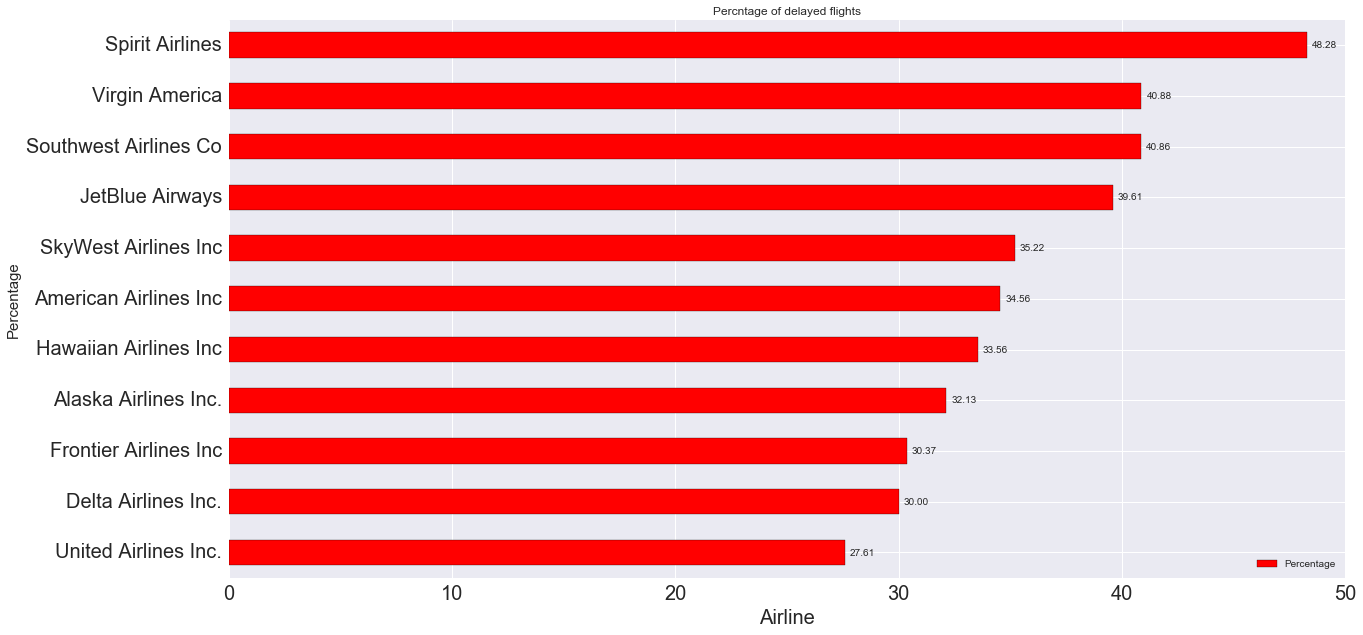

In [149]:
ax = delayratiodf.plot(y='Percentage', kind='barh', figsize=(20,10), title='Percntage of delayed flights', color='red')

plt.ylabel('Percentage', fontsize=15); plt.xlabel('Airline', fontsize=20)
plt.tick_params(axis='both', labelsize=20)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

## To be continued...